In [17]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()


tensor([0., 0., 0., 0., 0., 1.])

Multinomial(total_count, probs) 表示 多项分布，这里 total_count=1，所以等价于在概率向量 fair_probs 上 采样一次。

sample() 会返回一个长度为 6 的向量

In [18]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1830, 0.1440, 0.1630, 0.1820, 0.1630, 0.1650])

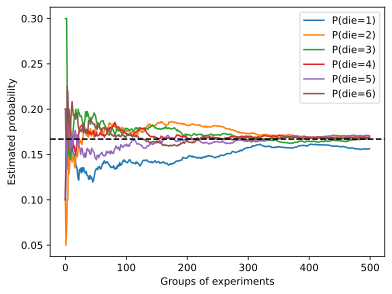

In [19]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [20]:
cum_counts


tensor([[  1.,   1.,   3.,   1.,   2.,   2.],
        [  3.,   1.,   6.,   3.,   3.,   4.],
        [  5.,   2.,   9.,   5.,   4.,   5.],
        ...,
        [777., 842., 836., 842., 851., 832.],
        [778., 846., 837., 843., 853., 833.],
        [782., 846., 840., 844., 854., 834.]])

In [21]:
estimates

tensor([[0.1000, 0.1000, 0.3000, 0.1000, 0.2000, 0.2000],
        [0.1500, 0.0500, 0.3000, 0.1500, 0.1500, 0.2000],
        [0.1667, 0.0667, 0.3000, 0.1667, 0.1333, 0.1667],
        ...,
        [0.1560, 0.1691, 0.1679, 0.1691, 0.1709, 0.1671],
        [0.1559, 0.1695, 0.1677, 0.1689, 0.1709, 0.1669],
        [0.1564, 0.1692, 0.1680, 0.1688, 0.1708, 0.1668]])

这段代码其实是 **用模拟实验来逼近骰子点数的概率分布**，并且画图展示「频率 → 概率」的收敛过程。逐行拆给你看：

---

### 1. 采样

```python
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
```

* `Multinomial(10, fair_probs)`：相当于 **一次掷 10 个公平骰子**，统计每个点数（1~6）出现了多少次。
* `.sample((500,))`：重复这个实验 500 次，得到一个 `500×6` 的张量，每一行是某次实验的结果，比如：

  ```
  tensor([1., 2., 0., 3., 2., 2.])   # 一次实验，10 个骰子的结果统计
  ```

---

### 2. 累积次数

```python
cum_counts = counts.cumsum(dim=0)
```

* `cumsum(dim=0)`：按实验次数做累计和。
* 这样第 `n` 行就是前 `n` 次实验的总统计。

---

### 3. 估计概率

```python
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
```

* 把累计次数除以总次数，得到**每一面出现的频率**。
* 随着实验次数增加，频率会逐渐趋近理论值 `1/6 ≈ 0.167`。

---

### 4. 设置图表大小

```python
d2l.set_figsize((6, 4.5))
```

* `d2l` 是《动手学深度学习》的工具包。
* `set_figsize` 是个封装过的 matplotlib 接口，用来设置画布大小。

---

### 5. 画出六条曲线

```python
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
```

* 循环 6 次，每个 `i` 对应骰子的 1~6 点。
* `.plot(...)` 画出随实验组数变化的「估计概率」。

---

### 6. 理论概率参考线

```python
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
```

* 在 y=0.167 画一条黑色虚线，表示理论值 1/6。

---

### 7. 添加标签和图例

```python
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
```

* `gca()` 获取当前坐标轴对象。
* `set_xlabel` / `set_ylabel` 设置坐标轴标题。
* `legend()` 显示每条曲线的标签。

---

总结：
这段代码调用的方法主要有：

* **`multinomial.Multinomial(...).sample`** → 抽样
* **`.cumsum`** → 累积和
* **`.sum`** → 按行求和
* **matplotlib 接口**：`plot`, `axhline`, `gca().set_xlabel`, `set_ylabel`, `legend`
* **d2l 的封装**：`set_figsize`

---

要不要我给你画出一个实际运行后的图（六条曲线逐渐收敛到 1/6 的水平线）？
